# 1. Configuration

Installing and importing related libraries


1.   Pandas - Dataframe & data manipulation
2.   Pycountry - List of countries and official ISO codes
3.   Numpy - Array manipulation & calculation
4.   Matplotlib - Visualization and charting
5.   Seaborn - Visualization and charting



In [1]:
# installing pycountry for country list
!pip install pycountry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 27.8 MB/s eta 0:00:00


In [2]:
import pandas as pd # this is importing python/pandas library
import pycountry as pyc # pycountry to get the legitimate countries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm # import colormap module for legend coloring
import seaborn as sns

In [3]:
# sample of countries list
list(pyc.countries)[0]

Country(alpha_2='AW', alpha_3='ABW', flag='🇦🇼', name='Aruba', numeric='533')

In [4]:
# get the list of all the legitimate countries
data = [[country.alpha_3, country.name] for country in pyc.countries]

countries_df = pd.DataFrame(data, columns=['country_code', 'country'])

countries_df.head()

,country_code,country
0,ABW,Aruba
1,AFG,Afghanistan
2,AGO,Angola
3,AIA,Anguilla
4,ALA,Åland Islands


# 2. Read the Data

Reading the cleaned source data from Google Drive. Data is about life expectancy of developing countries.

In [5]:

from google.colab import drive
drive.mount('/content/drive',force_remount=True)

df = pd.read_csv('/content/drive/MyDrive/Dataset/life_expectancy_developing_country.csv')
df.head() #this show top rows

Mounted at /content/drive


,country,country_code,indicator_name,indicator_code,year,life_expectancy
0,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1990,45.118
1,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1990,41.854
2,Argentina,ARG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1990,71.615
3,Burundi,BDI,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1990,45.184
4,Benin,BEN,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1990,53.020


In [6]:
# data with the "world"
df_wld = pd.read_csv('/content/drive/MyDrive/Dataset/Copy of life_expectancy_developing_country.csv')
df_wld.head()

,country,country_code,indicator_name,indicator_code,year,life_expectancy
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1990,72.546000
1,Africa Eastern And Southern,AFE,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1990,51.096326
2,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1990,45.118000
3,Africa Western And Central,AFW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1990,48.459295
4,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1990,41.854000


# 3. Inspect the Dataset

In [7]:
# check the dataset content
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3264 entries, 0 to 3263
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          3264 non-null   object 
 1   country_code     3264 non-null   object 
 2   indicator_name   3264 non-null   object 
 3   indicator_code   3264 non-null   object 
 4   year             3264 non-null   int64  
 5   life_expectancy  3264 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 153.1+ KB


In [8]:
# `include = 'all'` param for categorical data as well
df.describe(include='all')

,country,country_code,indicator_name,indicator_code,year,life_expectancy
count,3264,3264,3264,3264,3264.000000,3264.000000
unique,96,96,1,1,NaN,NaN
top,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,NaN,NaN
freq,34,34,3264,3264,NaN,NaN
mean,NaN,NaN,NaN,NaN,2006.500000,63.765748
std,NaN,NaN,NaN,NaN,9.812212,9.062446
min,NaN,NaN,NaN,NaN,1990.000000,12.158000
25%,NaN,NaN,NaN,NaN,1998.000000,58.059500
50%,NaN,NaN,NaN,NaN,2006.500000,65.095000
75%,NaN,NaN,NaN,NaN,2015.000000,70.918750


In [9]:
# check for unique country code
df_country_unq = df.country.unique()
display(df_country_unq)


array(['Afghanistan', 'Angola', 'Argentina', 'Burundi', 'Benin',
       'Burkina Faso', 'Bangladesh', 'Belize', 'Brazil', 'Bhutan',
       'Botswana', 'Central African Republic', 'China', 'Cameroon',
       'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica', 'Cuba',
       'Djibouti', 'Dominican Republic', 'Algeria', 'Ecuador', 'Eritrea',
       'Ethiopia', 'Fiji', 'Gabon', 'Ghana', 'Guinea', 'Guinea-Bissau',
       'Equatorial Guinea', 'Guatemala', 'Guyana', 'Honduras', 'Haiti',
       'Indonesia', 'India', 'Iraq', 'Jamaica', 'Jordan', 'Kenya',
       'Cambodia', 'Kiribati', 'Lebanon', 'Liberia', 'Libya', 'Sri Lanka',
       'Lesotho', 'Morocco', 'Madagascar', 'Maldives', 'Mexico', 'Mali',
       'Myanmar', 'Mongolia', 'Mozambique', 'Mauritania', 'Mauritius',
       'Malawi', 'Malaysia', 'Namibia', 'Niger', 'Nigeria', 'Nicaragua',
       'Nepal', 'Pakistan', 'Peru', 'Philippines', 'Papua New Guinea',
       'Paraguay', 'Rwanda', 'Sudan', 'Senegal', 'Solomon Islands',
       'Sierra Leo

In [10]:
# drop zonal categories and keep actual countries only
df_country_cleaned = df.merge(countries_df, on='country_code', how='inner', suffixes = [None, '_mapping'])
df_country_cleaned.head()

,country,country_code,indicator_name,indicator_code,year,life_expectancy,country_mapping
0,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1990,45.118,Afghanistan
1,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1990,41.854,Angola
2,Argentina,ARG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1990,71.615,Argentina
3,Burundi,BDI,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1990,45.184,Burundi
4,Benin,BEN,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1990,53.020,Benin


In [11]:
# check again for country names
country_cleaned_unq = df_country_cleaned.country_mapping.unique()
print(country_cleaned_unq)

['Afghanistan' 'Angola' 'Argentina' 'Burundi' 'Benin' 'Burkina Faso'
 'Bangladesh' 'Belize' 'Brazil' 'Bhutan' 'Botswana'
 'Central African Republic' 'China' 'Cameroon' 'Colombia' 'Comoros'
 'Cabo Verde' 'Costa Rica' 'Cuba' 'Djibouti' 'Dominican Republic'
 'Algeria' 'Ecuador' 'Eritrea' 'Ethiopia' 'Fiji' 'Gabon' 'Ghana' 'Guinea'
 'Guinea-Bissau' 'Equatorial Guinea' 'Guatemala' 'Guyana' 'Honduras'
 'Haiti' 'Indonesia' 'India' 'Iraq' 'Jamaica' 'Jordan' 'Kenya' 'Cambodia'
 'Kiribati' 'Lebanon' 'Liberia' 'Libya' 'Sri Lanka' 'Lesotho' 'Morocco'
 'Madagascar' 'Maldives' 'Mexico' 'Mali' 'Myanmar' 'Mongolia' 'Mozambique'
 'Mauritania' 'Mauritius' 'Malawi' 'Malaysia' 'Namibia' 'Niger' 'Nigeria'
 'Nicaragua' 'Nepal' 'Pakistan' 'Peru' 'Philippines' 'Papua New Guinea'
 'Paraguay' 'Rwanda' 'Sudan' 'Senegal' 'Solomon Islands' 'Sierra Leone'
 'El Salvador' 'South Sudan' 'Sao Tome and Principe' 'Suriname' 'Eswatini'
 'Syrian Arab Republic' 'Chad' 'Togo' 'Thailand' 'Timor-Leste'
 'Trinidad and Tobago' 'T

In [12]:
# add back the world data
df_country_cln_wld = pd.concat([df_country_cleaned, df_wld[df_wld['country'] == 'World']])
df_country_cln_wld['country_mapping'].fillna('World', inplace=True)
df_country_cln_wld.tail()

/tmp/ipython-input-1451376720.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_country_cln_wld['country_mapping'].fillna('World', inplace=True)


,country,country_code,indicator_name,indicator_code,year,life_expectancy,country_mapping
7973,World,WLD,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2019,72.868910,World
8239,World,WLD,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2020,72.182224,World
8505,World,WLD,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2021,71.215484,World
8771,World,WLD,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2022,72.969016,World
9037,World,WLD,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2023,73.329716,World


In [13]:
# check for any null values
df_country_cln_wld.isna().sum()

,0
country,0
country_code,0
indicator_name,0
indicator_code,0
year,0
life_expectancy,0
country_mapping,0


In [14]:
# check for value_counts for each object column to identify duplicates
for column in df_country_cln_wld.columns:
  if df_country_cln_wld.dtypes[column] == 'object':
    print(df_country_cln_wld[column].value_counts())
    print('\n')

country
Afghanistan     34
Angola          34
Argentina       34
Burundi         34
Benin           34
                ..
Samoa           34
South Africa    34
Zambia          34
Zimbabwe        34
World           34
Name: count, Length: 97, dtype: int64


country_code
AFG    34
AGO    34
ARG    34
BDI    34
BEN    34
       ..
WSM    34
ZAF    34
ZMB    34
ZWE    34
WLD    34
Name: count, Length: 97, dtype: int64


indicator_name
Life expectancy at birth, total (years)    3298
Name: count, dtype: int64


indicator_code
SP.DYN.LE00.IN    3298
Name: count, dtype: int64


country_mapping
Afghanistan     34
Angola          34
Argentina       34
Burundi         34
Benin           34
                ..
Samoa           34
South Africa    34
Zambia          34
Zimbabwe        34
World           34
Name: count, Length: 97, dtype: int64




In [15]:
# to drop `indicator_code` & `indicator_name` as it is duplicate across all rows
df_cleaned_dedup = df_country_cln_wld[['country_mapping', 'country_code', 'year', 'life_expectancy']]

# filter out year 2000 onwards as the scope is 2000-2023
df_cleaned_dedup = df_cleaned_dedup.loc[df_cleaned_dedup['year'] > 1999].reset_index(drop=True).rename(columns={'country_mapping':'country'})
df_cleaned_dedup.head()

,country,country_code,year,life_expectancy
0,Afghanistan,AFG,2000,55.005
1,Angola,AGO,2000,46.501
2,Argentina,ARG,2000,73.910
3,Burundi,BDI,2000,47.617
4,Benin,BEN,2000,56.594


In [16]:
# check EDA by country, see if each country got 24 years of data or not
df_grpby_cty = df_cleaned_dedup.groupby(by=['country']).count().sort_values(by=['year'], ascending=True)
df_grpby_cty.tail()

,country_code,year,life_expectancy
country,,,
Vanuatu,24,24,24
Viet Nam,24,24,24
World,24,24,24
Zambia,24,24,24
Zimbabwe,24,24,24


# 4. All Developing Countries vs. World Statistical Benchmark

In [17]:
# check global level benchmark
world_data = df_cleaned_dedup[df_cleaned_dedup['country'] == 'World']
world_data.head()

,country,country_code,year,life_expectancy
2304,World,WLD,2000,67.649726
2305,World,WLD,2001,67.944398
2306,World,WLD,2002,68.230564
2307,World,WLD,2003,68.514961
2308,World,WLD,2004,68.770252


In [18]:
# global mean, min, max & median over 24 years
world_stats_by_year = world_data['life_expectancy'].agg(['mean', 'min', 'max', 'median']).reset_index()

all_stats_by_year = df_cleaned_dedup['life_expectancy'].agg(['mean', 'min', 'max', 'median']).reset_index()

min_max_median_mean_df = world_stats_by_year.join(all_stats_by_year, how='inner', lsuffix='_world', rsuffix='_all',)

min_max_median_mean_df = min_max_median_mean_df[['index_world', 'life_expectancy_world', 'life_expectancy_all']].rename(columns={'index_world': 'stats'})

display(min_max_median_mean_df)

,stats,life_expectancy_world,life_expectancy_all
0,mean,70.742561,65.503192
1,min,67.649726,14.665000
2,max,73.329716,81.041000
3,median,71.091749,66.354000


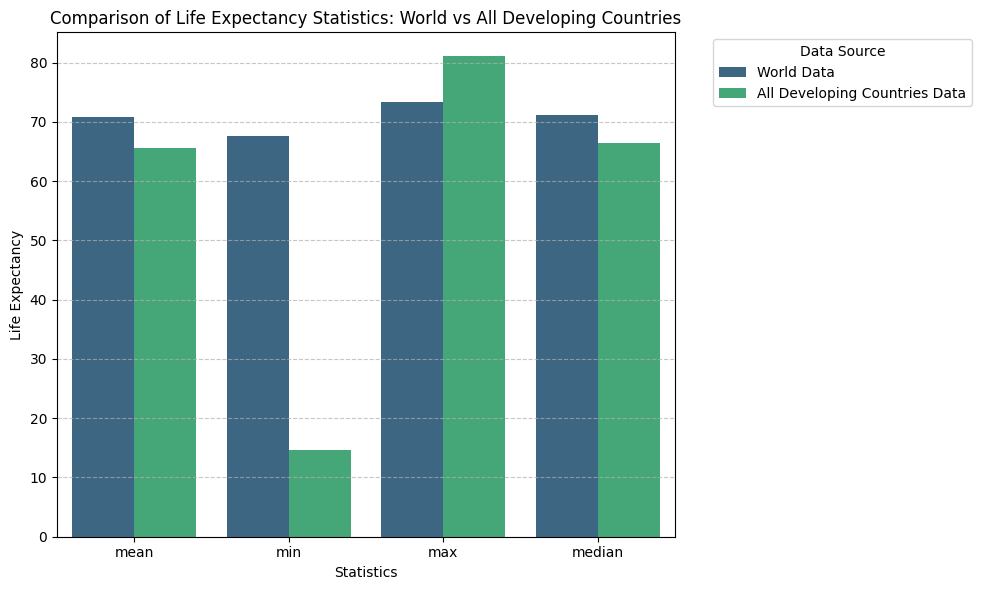

In [19]:
# Melt the DataFrame to long format for easier plotting
df_melted = min_max_median_mean_df.melt(id_vars='stats', var_name='data_source', value_name='life_expectancy')

# Rename the 'Data_Source' values for better readability
df_melted['data_source'] = df_melted['data_source'].replace({
    'life_expectancy_world': 'World Data',
    'life_expectancy_all': 'All Developing Countries Data'
})

plt.figure(figsize=(10, 6))
sns.barplot(x='stats', y='life_expectancy', hue='data_source', data=df_melted, palette='viridis')
plt.title('Comparison of Life Expectancy Statistics: World vs All Developing Countries')
plt.xlabel('Statistics')
plt.ylabel('Life Expectancy')
plt.legend(title='Data Source', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [20]:
# compare the the mean between all the countries and the world
df_all_countries = df_cleaned_dedup[df_cleaned_dedup['country'] != 'World']
yearly_mean_all_countries = df_all_countries.groupby('year')['life_expectancy'].mean().reset_index()
yearly_mean_all_countries.head()

,year,life_expectancy
0,2000,61.373509
1,2001,61.736933
2,2002,62.116782
3,2003,62.499765
4,2004,62.811324


In [21]:
yearly_mean_all_countries_plot = yearly_mean_all_countries.copy()
yearly_mean_all_countries_plot['Data_Source'] = 'Mean of All Developing Countries'
yearly_mean_all_countries_plot.head()

,year,life_expectancy,Data_Source
0,2000,61.373509,Mean of All Developing Countries
1,2001,61.736933,Mean of All Developing Countries
2,2002,62.116782,Mean of All Developing Countries
3,2003,62.499765,Mean of All Developing Countries
4,2004,62.811324,Mean of All Developing Countries


In [22]:
world_data_plot = world_data.copy()
world_data_plot['Data_Source'] = 'World'
world_data_plot.head()

,country,country_code,year,life_expectancy,Data_Source
2304,World,WLD,2000,67.649726,World
2305,World,WLD,2001,67.944398,World
2306,World,WLD,2002,68.230564,World
2307,World,WLD,2003,68.514961,World
2308,World,WLD,2004,68.770252,World


In [23]:
combined_yearly_data = pd.concat([yearly_mean_all_countries_plot, world_data_plot[['year', 'life_expectancy', 'Data_Source']]])
combined_yearly_data.head()

,year,life_expectancy,Data_Source
0,2000,61.373509,Mean of All Developing Countries
1,2001,61.736933,Mean of All Developing Countries
2,2002,62.116782,Mean of All Developing Countries
3,2003,62.499765,Mean of All Developing Countries
4,2004,62.811324,Mean of All Developing Countries


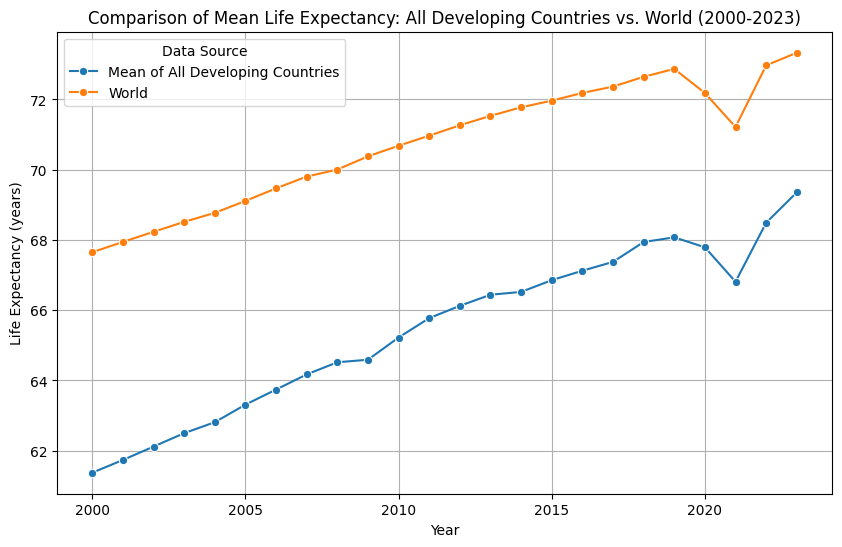

In [24]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_yearly_data, x='year', y='life_expectancy', hue='Data_Source', marker='o')
plt.title('Comparison of Mean Life Expectancy: All Developing Countries vs. World (2000-2023)')
plt.xlabel('Year')
plt.ylabel('Life Expectancy (years)')
plt.legend(title='Data Source')
plt.grid(True)
plt.show()

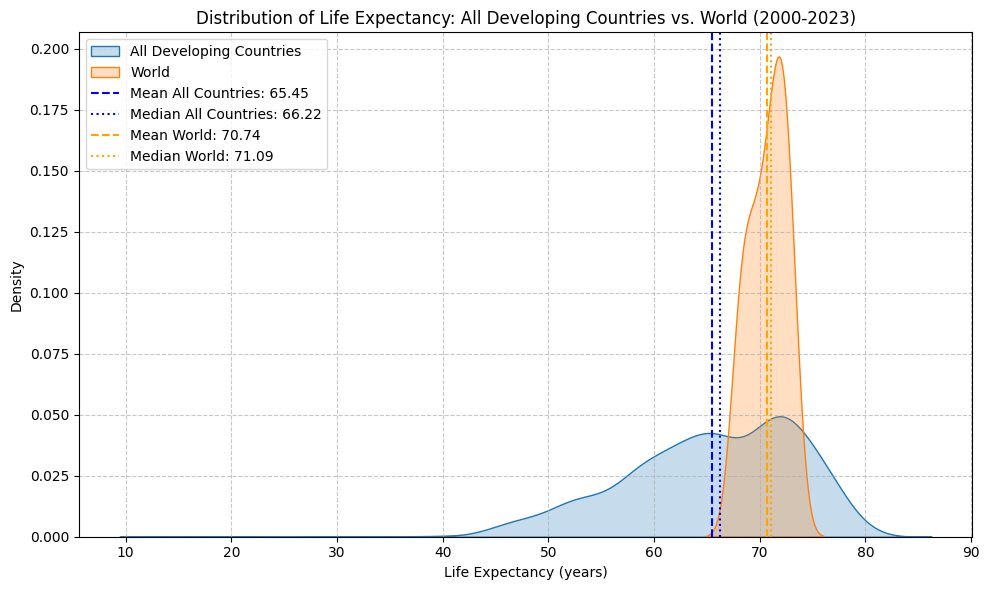

In [25]:
# Calculate mean and median for 'All Developing Countries'
mean_all_countries = df_all_countries['life_expectancy'].mean()
median_all_countries = df_all_countries['life_expectancy'].median()

# Calculate mean and median for 'World'
mean_world = world_data['life_expectancy'].mean()
median_world = world_data['life_expectancy'].median()

plt.figure(figsize=(10, 6))
sns.kdeplot(df_all_countries['life_expectancy'], label='All Developing Countries', fill=True)
sns.kdeplot(world_data['life_expectancy'], label='World', fill=True)

# Add vertical lines for mean and median of 'All Developing Countries'
plt.axvline(mean_all_countries, color='blue', linestyle='--', linewidth=1.5, label=f'Mean All Countries: {mean_all_countries:.2f}')
plt.axvline(median_all_countries, color='blue', linestyle=':', linewidth=1.5, label=f'Median All Countries: {median_all_countries:.2f}')

# Add vertical lines for mean and median of 'World'
plt.axvline(mean_world, color='orange', linestyle='--', linewidth=1.5, label=f'Mean World: {mean_world:.2f}')
plt.axvline(median_world, color='orange', linestyle=':', linewidth=1.5, label=f'Median World: {median_world:.2f}')

plt.title('Distribution of Life Expectancy: All Developing Countries vs. World (2000-2023)')
plt.xlabel('Life Expectancy (years)')
plt.ylabel('Density')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 5. Outliers Analysis

In [26]:
outliers_by_country = {}

# Exclude 'World' from the analysis as it's an aggregate
df_countries_only = df_cleaned_dedup[df_cleaned_dedup['country'] != 'World']

for country in df_countries_only['country'].unique():
    country_data = df_countries_only[df_countries_only['country'] == country]['life_expectancy']

    Q1 = country_data.quantile(0.25)
    Q3 = country_data.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers for the current country
    num_outliers = country_data[(country_data < lower_bound) | (country_data > upper_bound)].count()
    outliers_by_country[country] = num_outliers

outliers_df = pd.DataFrame(outliers_by_country.items(), columns=['country', 'num_outliers'])
outliers_df_sorted = outliers_df.sort_values(by='num_outliers', ascending=False)

display(outliers_df_sorted.head(10))

,country,num_outliers
11,Central African Republic,6
18,Cuba,4
51,Mexico,2
45,Libya,2
92,Samoa,2
42,Kiribati,1
7,Belize,1
44,Liberia,1
34,Haiti,1
63,Nicaragua,1


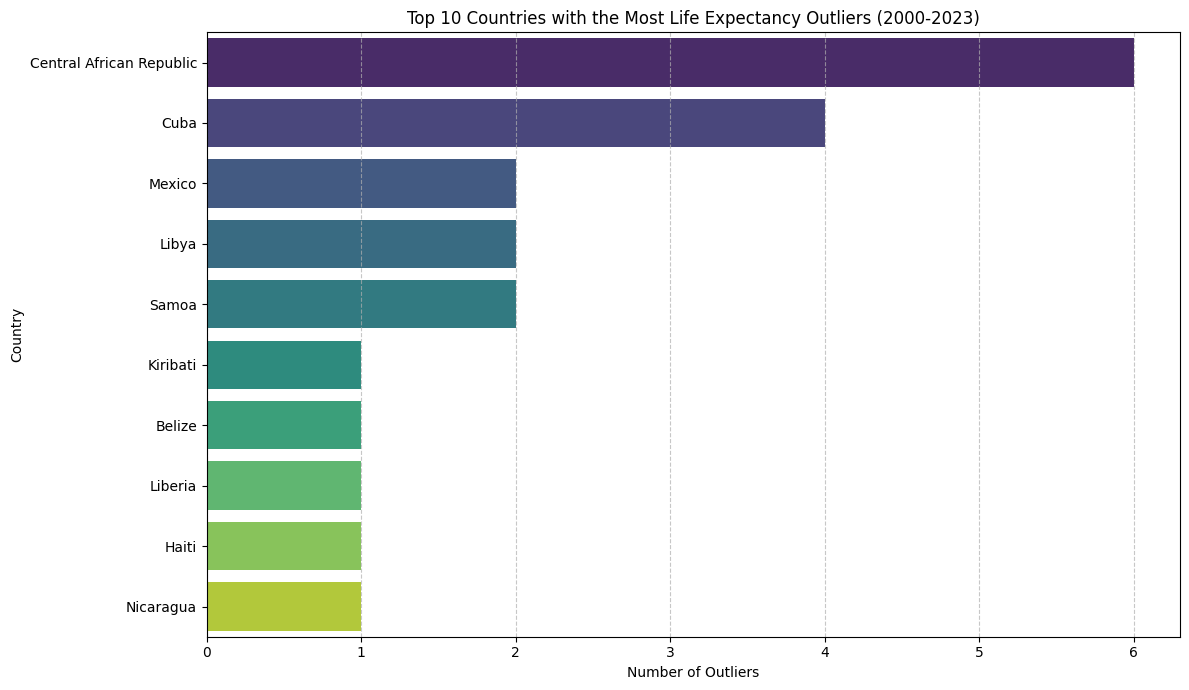

In [27]:
plt.figure(figsize=(12, 7))
sns.barplot(x='num_outliers', y='country', data=outliers_df_sorted.head(10), palette='viridis', hue='country', legend=False)
plt.title('Top 10 Countries with the Most Life Expectancy Outliers (2000-2023)')
plt.xlabel('Number of Outliers')
plt.ylabel('Country')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 6. Top 10 & Bottom 10 By Mean Countries Analysis

In [28]:
top_10_list = pd.DataFrame(df_cleaned_dedup.groupby("country")["life_expectancy"].mean().sort_values(ascending=False)).head(10).reset_index()
bottom_10_list = pd.DataFrame(df_cleaned_dedup.groupby("country")["life_expectancy"].mean().sort_values(ascending=True)).head(10).reset_index()

In [29]:
display(top_10_list)
display(bottom_10_list)

,country,life_expectancy
0,Costa Rica,79.298125
1,Cuba,77.301500
2,Lebanon,76.799583
3,Maldives,76.716708
4,Uruguay,76.488500
5,China,75.784333
6,Argentina,75.559292
7,Malaysia,74.942417
8,Thailand,74.879000
9,Ecuador,74.862292


,country,life_expectancy
0,Central African Republic,45.129250
1,Lesotho,49.342875
2,Chad,50.732917
3,Nigeria,51.151333
4,Eswatini,51.690833
5,South Sudan,52.365375
6,Sierra Leone,53.268250
7,Zimbabwe,53.802875
8,Mali,56.176708
9,Mozambique,56.310542


In [30]:
df_top_10 = df_cleaned_dedup.loc[df_cleaned_dedup['country'].isin(top_10_list['country'].tolist())]
df_bottom_10 = df_cleaned_dedup.loc[df_cleaned_dedup['country'].isin(bottom_10_list['country'].tolist())]

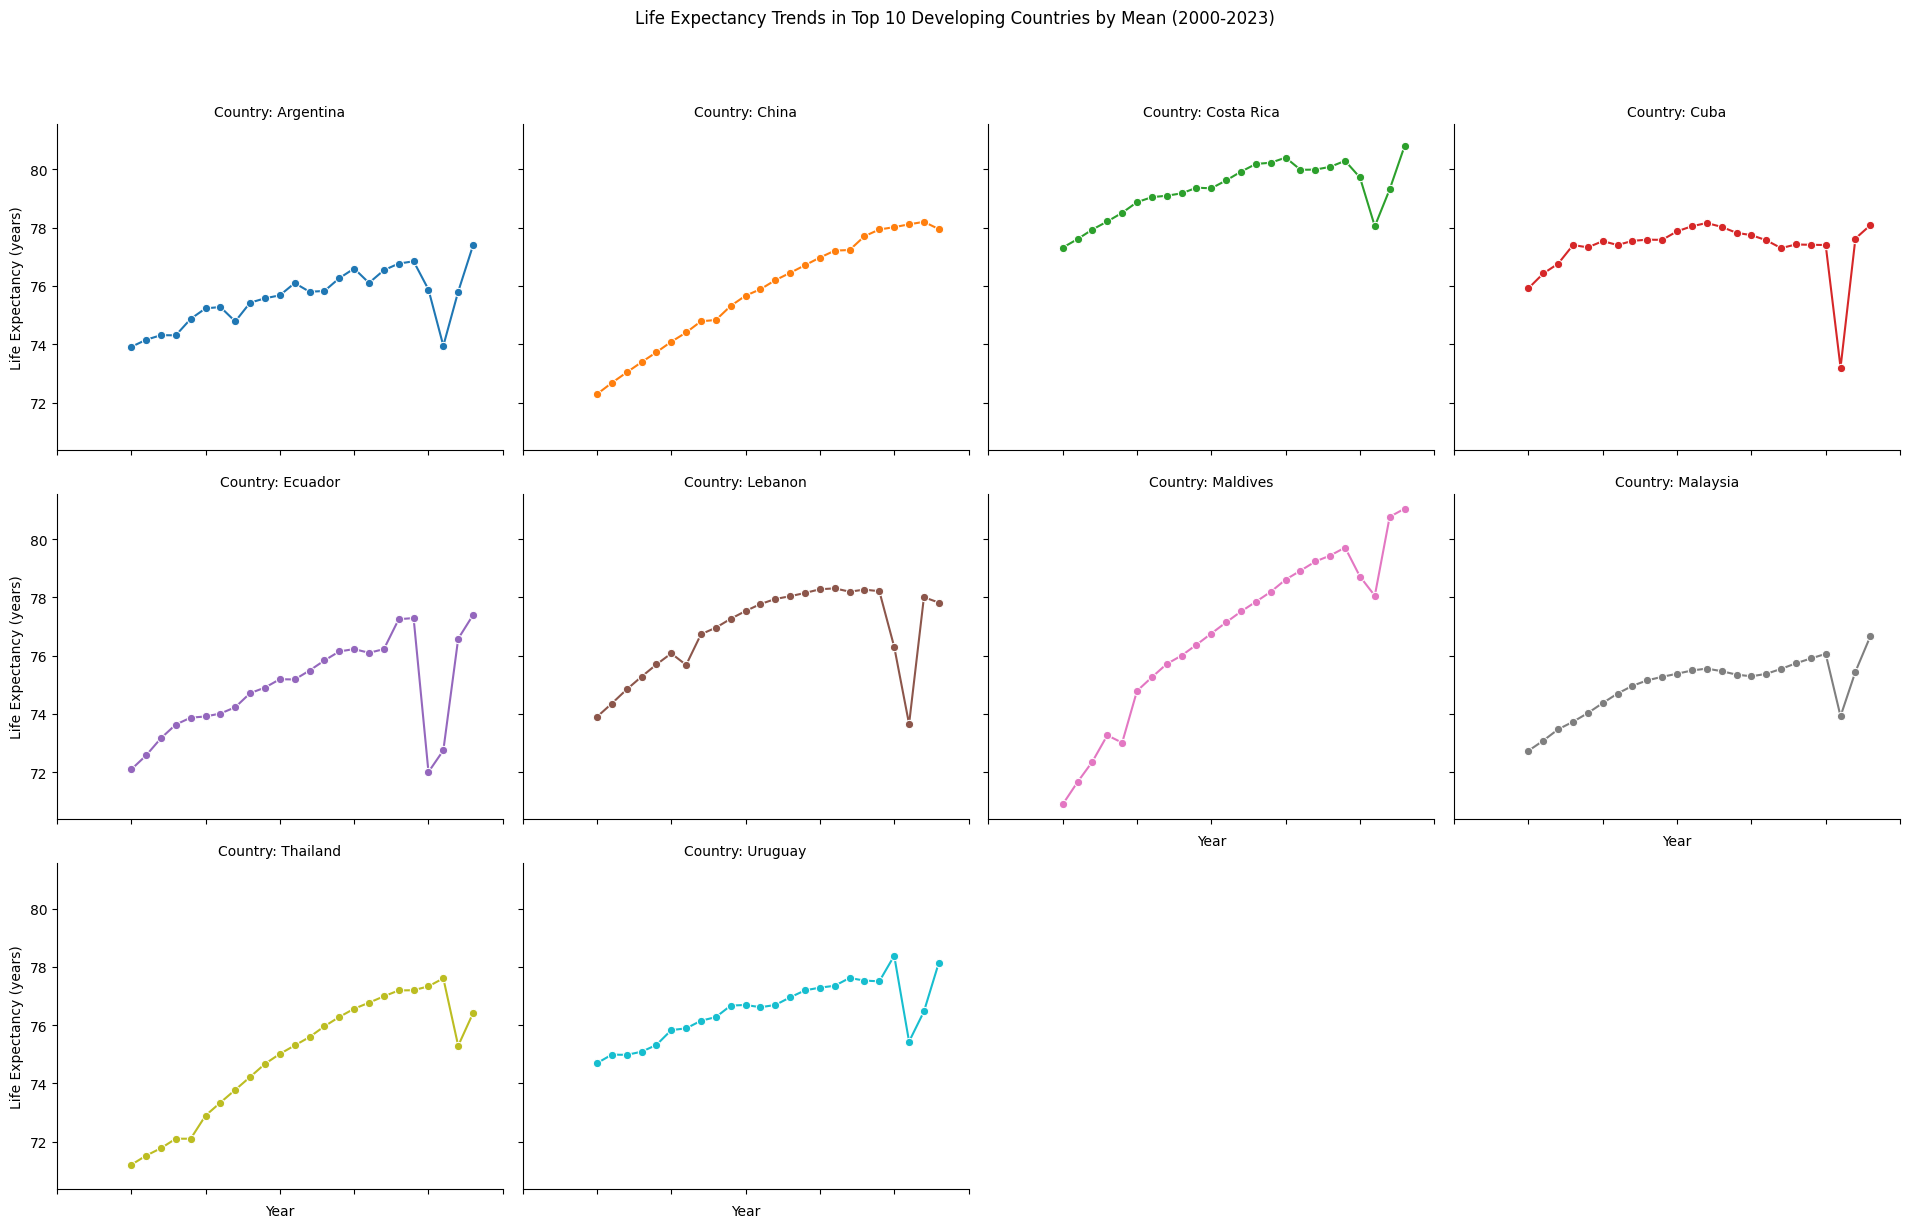

In [31]:
# top 10 countries by mean trend
g = sns.relplot(data=df_top_10, x='year', y='life_expectancy', col='country', col_wrap=4, kind='line', height=4, aspect=1.2, marker='o', hue='country', legend=False)
g.set_axis_labels('Year', 'Life Expectancy (years)')
g.set_titles('Country: {col_name}')
g.set_xticklabels(rotation=45, ha='right')
plt.suptitle('Life Expectancy Trends in Top 10 Developing Countries by Mean (2000-2023)', y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

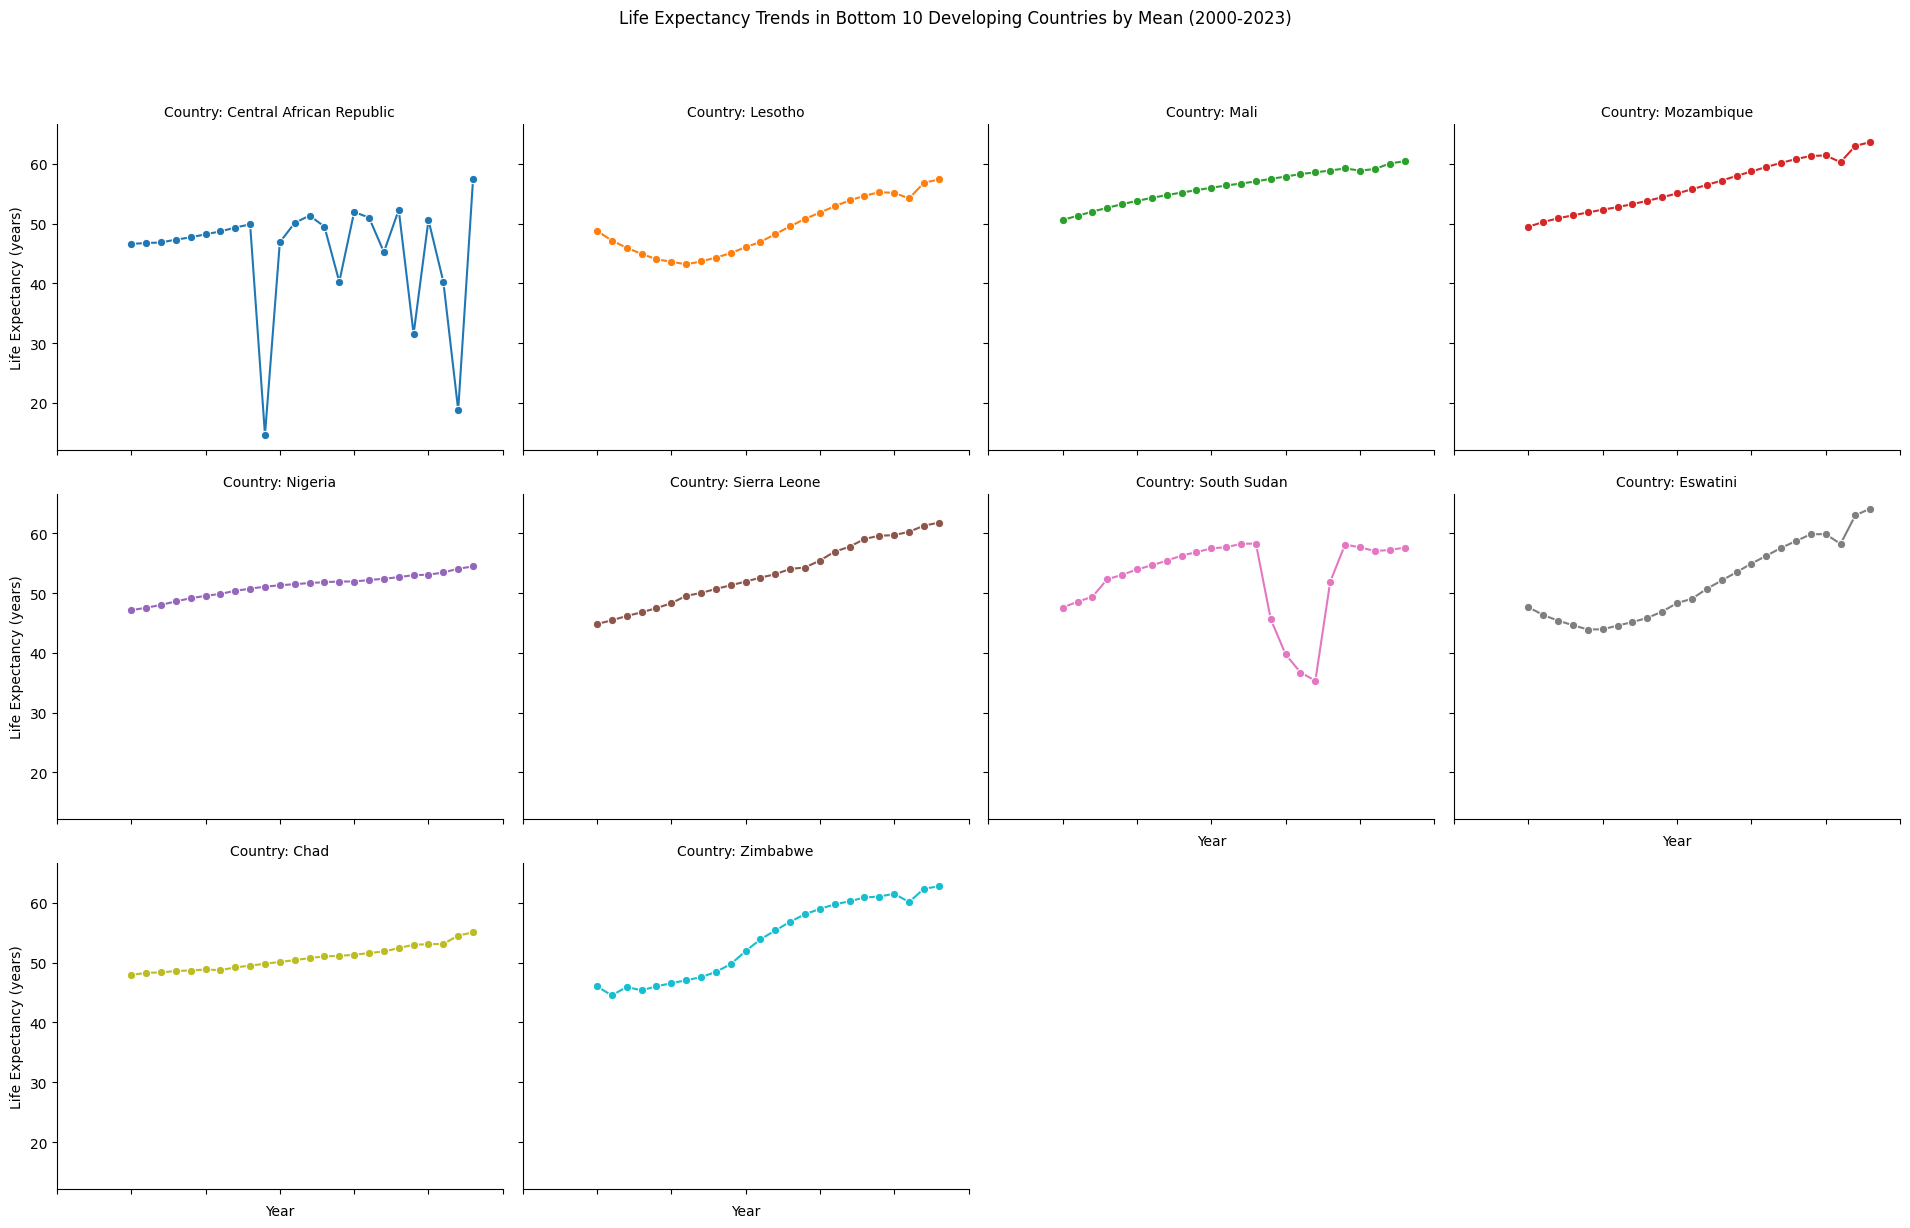

In [32]:
# bottom 10 countries by mean trend
g = sns.relplot(data=df_bottom_10, x='year', y='life_expectancy', col='country', col_wrap=4, kind='line', height=4, aspect=1.2, marker='o', hue='country', legend=False)
g.set_axis_labels('Year', 'Life Expectancy (years)')
g.set_titles('Country: {col_name}')
g.set_xticklabels(rotation=45, ha='right')
plt.suptitle('Life Expectancy Trends in Bottom 10 Developing Countries by Mean (2000-2023)', y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

/tmp/ipython-input-2995421060.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_10, x='country', y='life_expectancy', palette='viridis')


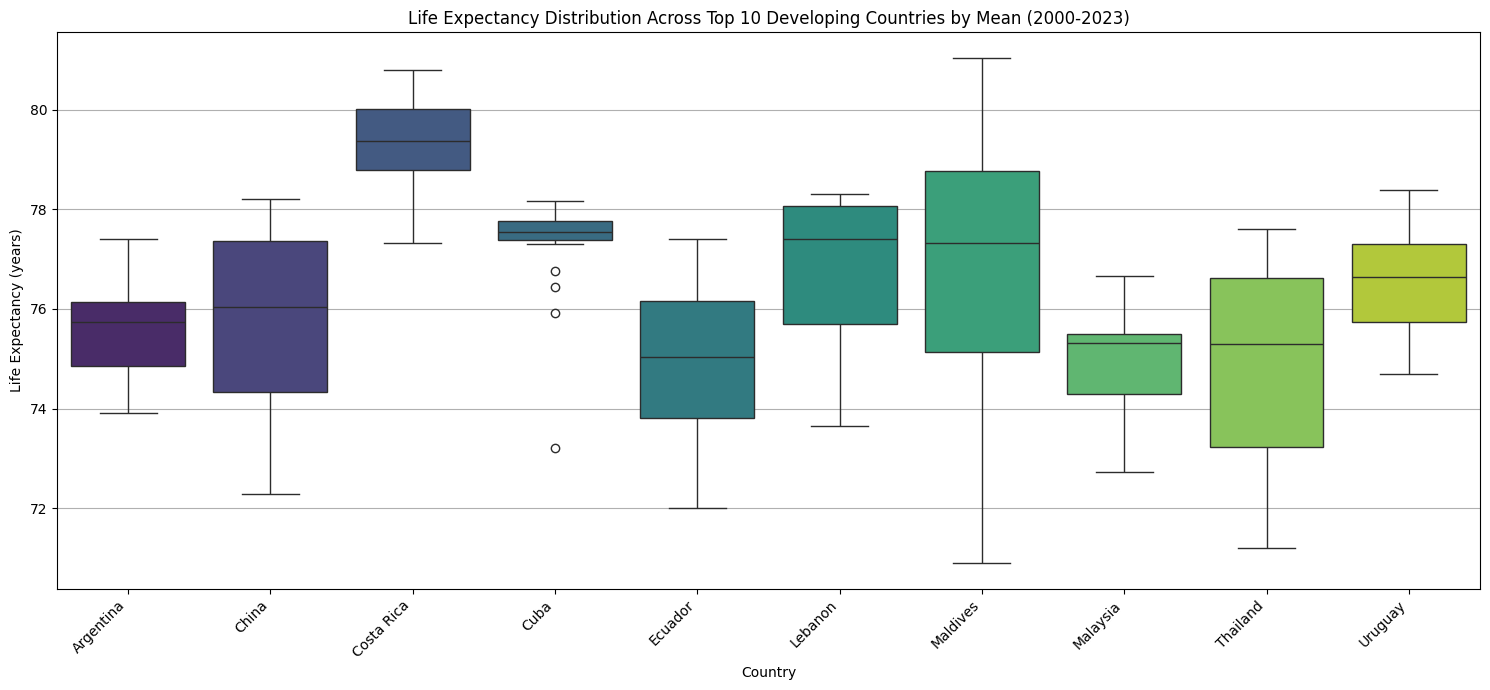

In [33]:
# distribution across top 10 countries
plt.figure(figsize=(15, 7))
sns.boxplot(data=df_top_10, x='country', y='life_expectancy', palette='viridis')
plt.title('Life Expectancy Distribution Across Top 10 Developing Countries by Mean (2000-2023)')
plt.xlabel('Country')
plt.ylabel('Life Expectancy (years)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

/tmp/ipython-input-4113092407.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_bottom_10, x='country', y='life_expectancy', palette='viridis')


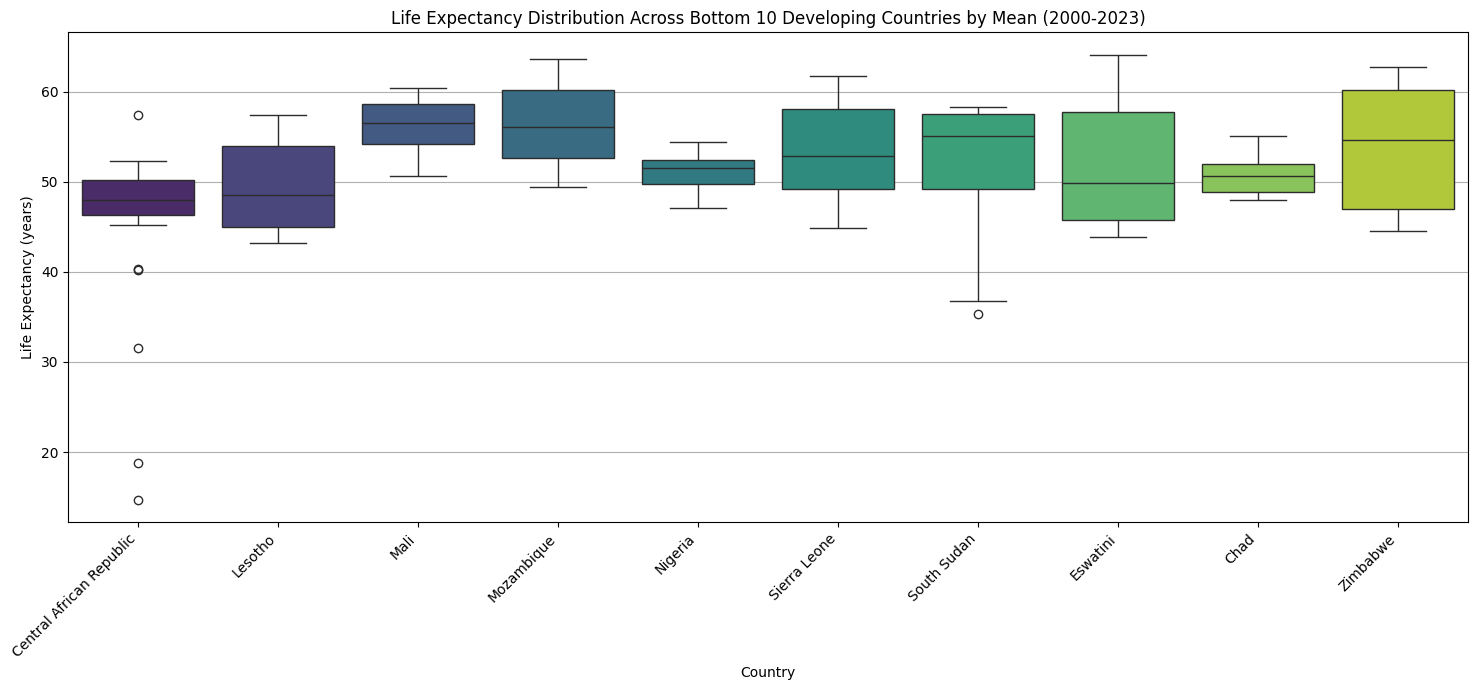

In [34]:
# distribution across bottom 10 countries
plt.figure(figsize=(15, 7))
sns.boxplot(data=df_bottom_10, x='country', y='life_expectancy', palette='viridis')
plt.title('Life Expectancy Distribution Across Bottom 10 Developing Countries by Mean (2000-2023)')
plt.xlabel('Country')
plt.ylabel('Life Expectancy (years)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

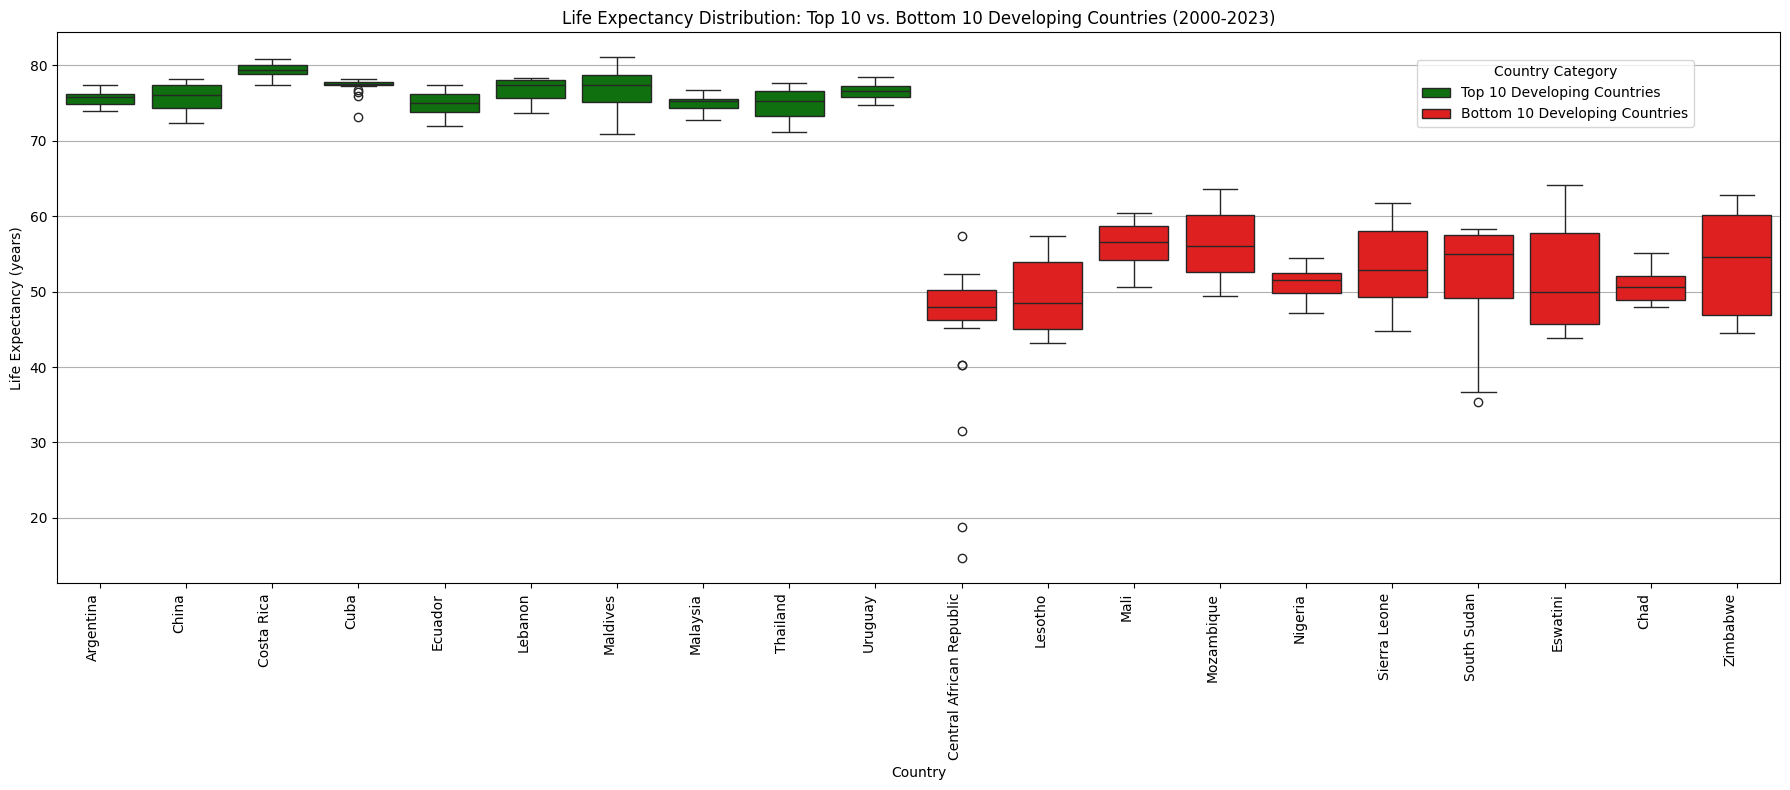

In [35]:
df_top_10_plot = df_top_10.copy()
df_bottom_10_plot = df_bottom_10.copy()

df_top_10_plot['category'] = 'Top 10 Developing Countries'
df_bottom_10_plot['category'] = 'Bottom 10 Developing Countries'

df_combined = pd.concat([df_top_10_plot, df_bottom_10_plot])

plt.figure(figsize=(18, 8))
sns.boxplot(data=df_combined, x='country', y='life_expectancy', hue='category', palette={'Top 10 Developing Countries': 'green', 'Bottom 10 Developing Countries': 'red'})
plt.title('Life Expectancy Distribution: Top 10 vs. Bottom 10 Developing Countries (2000-2023)')
plt.xlabel('Country')
plt.ylabel('Life Expectancy (years)')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Country Category', bbox_to_anchor=(0.95, 0.95), loc='upper right', borderaxespad=0.)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [36]:
# observe the YoY change
df_top_10["yoy_change"] = df_top_10.groupby("country")["life_expectancy"].diff()
df_bottom_10["yoy_change"] = df_bottom_10.groupby("country")["life_expectancy"].diff()

/tmp/ipython-input-2727565390.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_10["yoy_change"] = df_top_10.groupby("country")["life_expectancy"].diff()
/tmp/ipython-input-2727565390.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bottom_10["yoy_change"] = df_bottom_10.groupby("country")["life_expectancy"].diff()


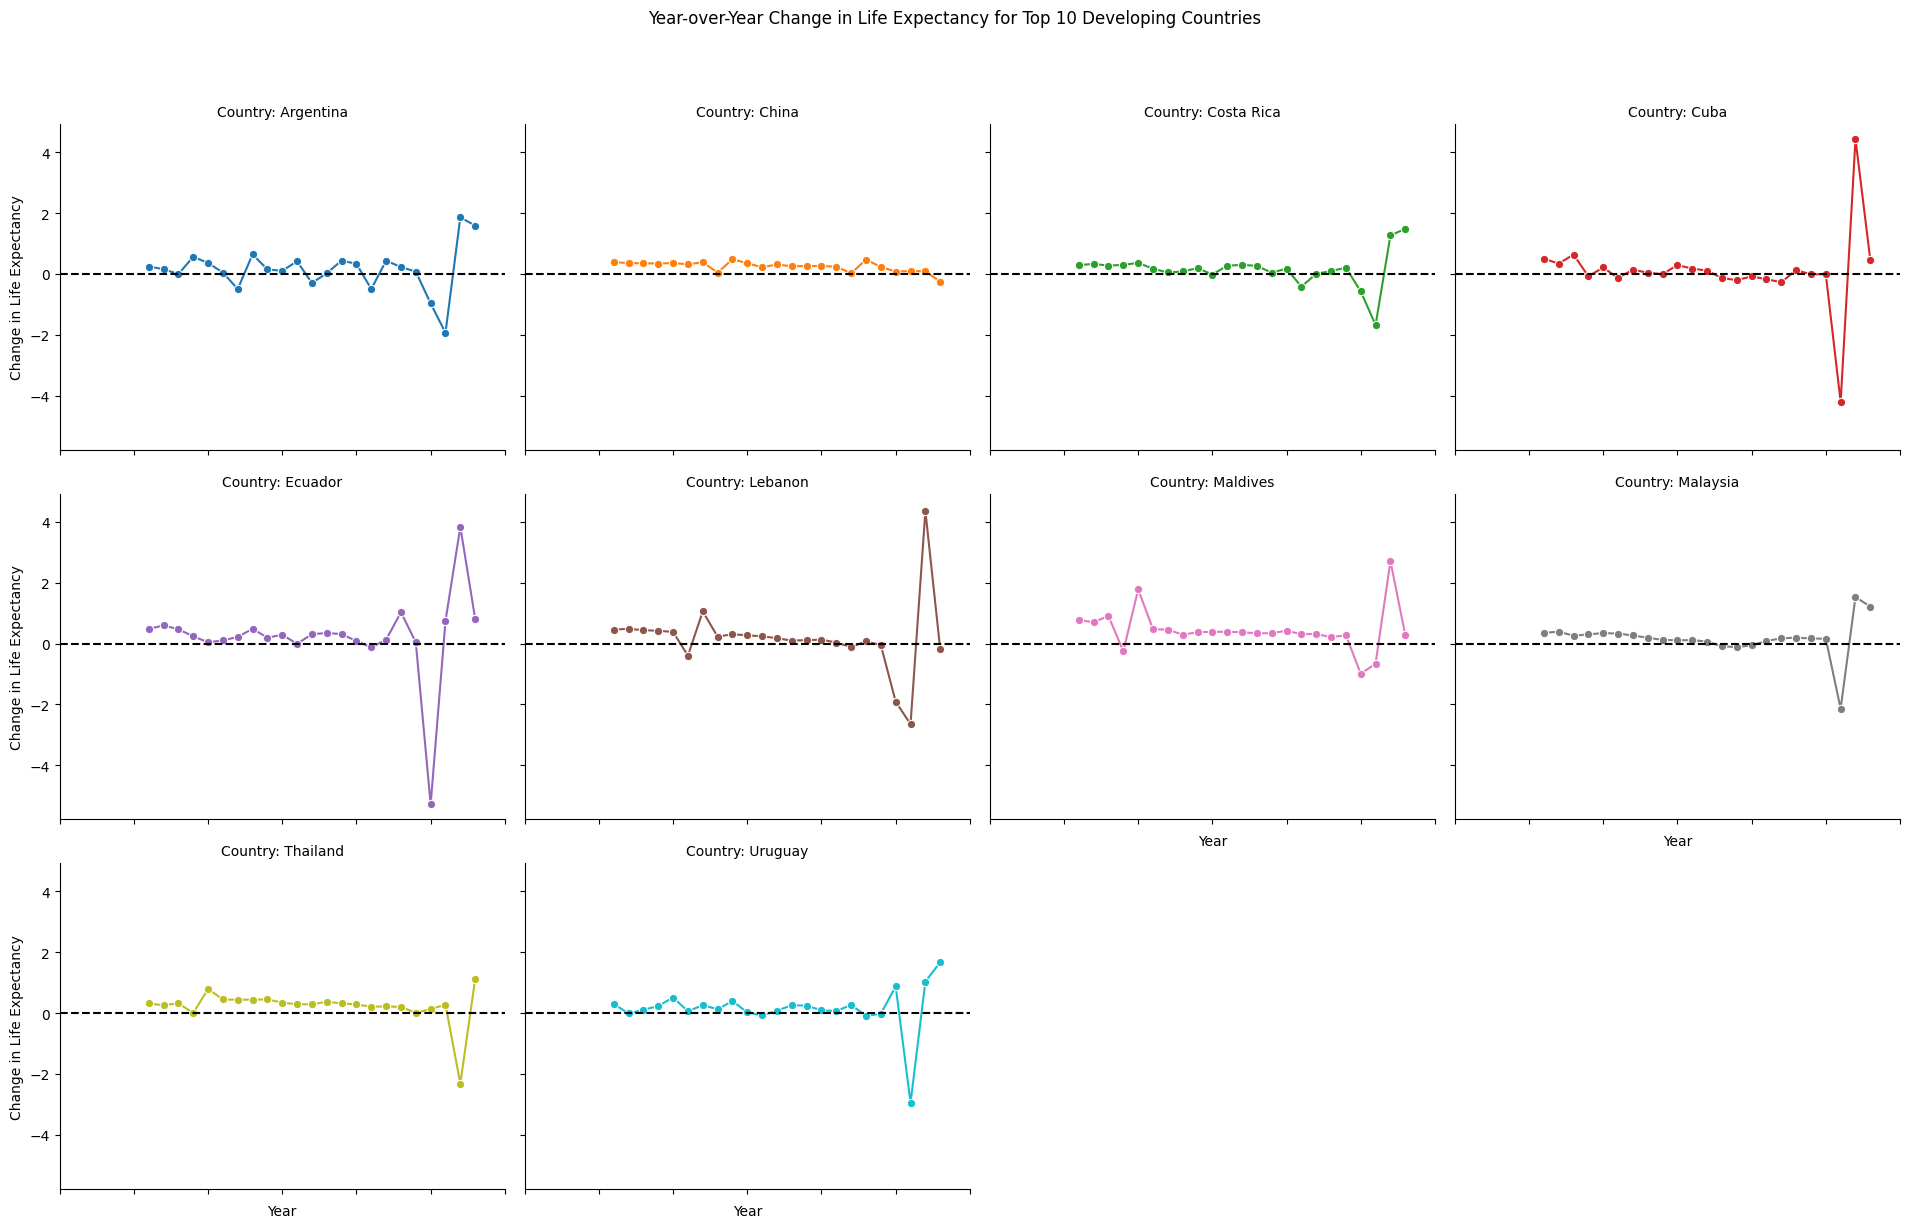

In [37]:
g = sns.relplot(data=df_top_10, x='year', y='yoy_change', col='country', col_wrap=4, kind='line', height=4, aspect=1.2, marker='o', hue='country', legend=False)

g.map(plt.axhline, y=0, color='black', ls='--')
g.set_axis_labels('Year', 'Change in Life Expectancy')
g.set_titles('Country: {col_name}')
g.set_xticklabels(rotation=45, ha='right')
plt.suptitle('Year-over-Year Change in Life Expectancy for Top 10 Developing Countries', y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

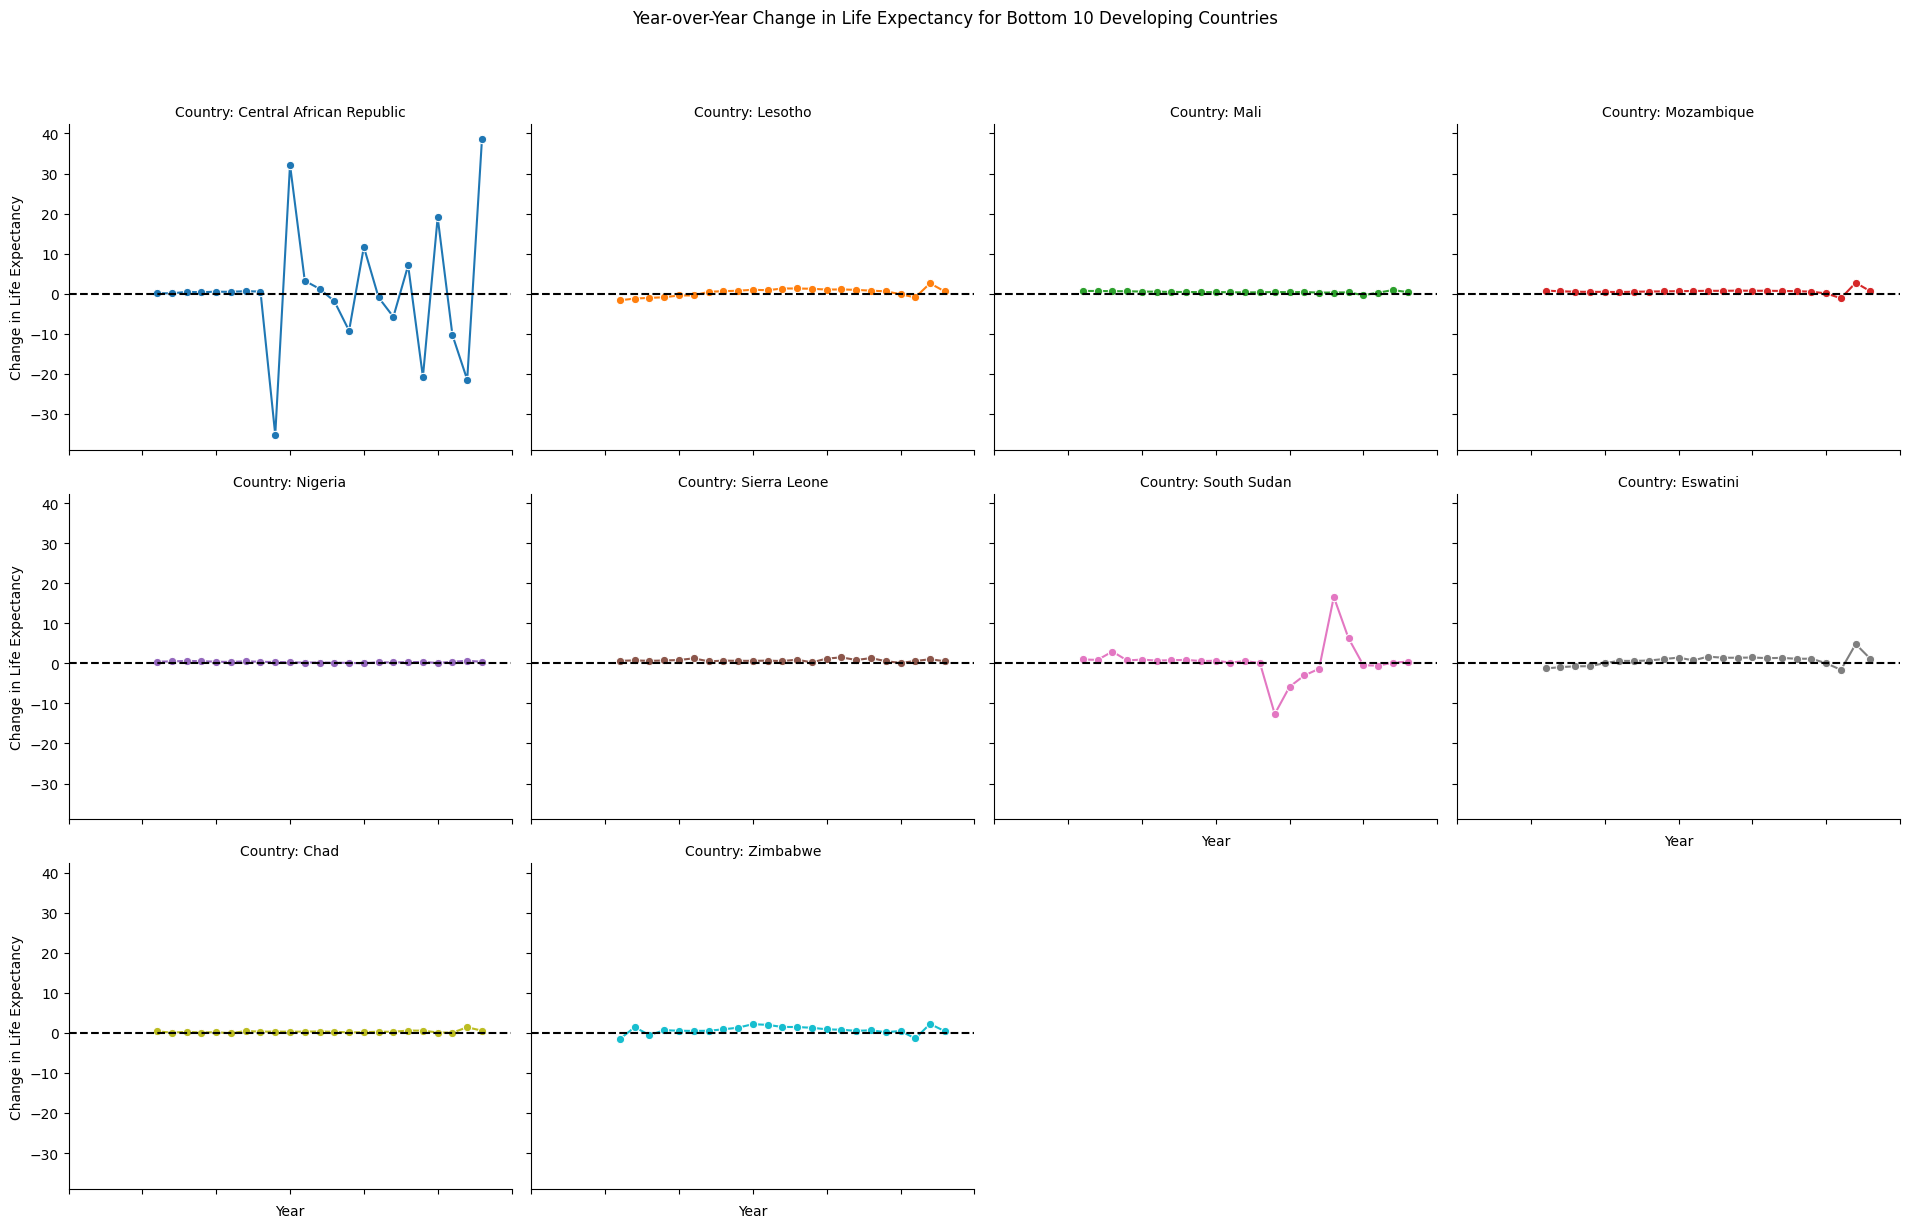

In [38]:
g = sns.relplot(data=df_bottom_10, x='year', y='yoy_change', col='country', col_wrap=4, kind='line', height=4, aspect=1.2, marker='o', hue='country', legend=False)

g.map(plt.axhline, y=0, color='black', ls='--')
g.set_axis_labels('Year', 'Change in Life Expectancy')
g.set_titles('Country: {col_name}')
g.set_xticklabels(rotation=45, ha='right')
plt.suptitle('Year-over-Year Change in Life Expectancy for Bottom 10 Developing Countries', y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

In [39]:
# to observer variability and distribution through standard deviation
display(df_top_10.groupby("country")["life_expectancy"].std().sort_values())
display(df_bottom_10.groupby("country")["life_expectancy"].std().sort_values())

,life_expectancy
country,
Costa Rica,0.948436
Argentina,0.970011
Malaysia,0.986029
Cuba,1.011501
Uruguay,1.043992
Lebanon,1.519978
Ecuador,1.646093
China,1.896922
Thailand,2.077018


,life_expectancy
country,
Nigeria,2.014179
Chad,2.041326
Mali,2.852239
Mozambique,4.300612
Lesotho,4.713955
Sierra Leone,5.357905
Eswatini,6.601290
Zimbabwe,6.645543
South Sudan,6.903340


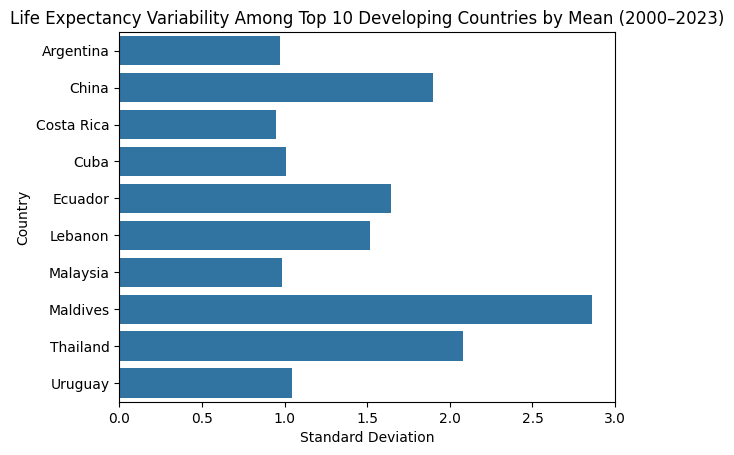

In [40]:
sns.barplot(x=df_top_10.groupby("country")["life_expectancy"].std(),
            y=df_top_10.groupby("country")["life_expectancy"].std().index)
plt.title("Life Expectancy Variability Among Top 10 Developing Countries by Mean (2000–2023)")
plt.xlabel("Standard Deviation")
plt.ylabel("Country")
plt.show()

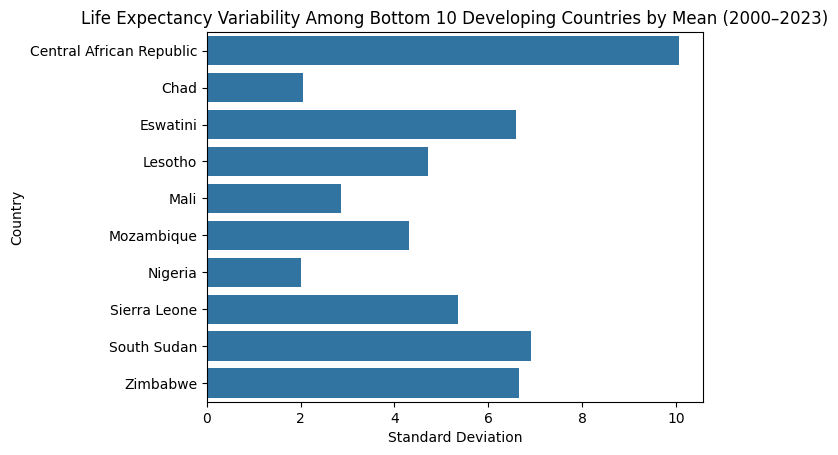

In [41]:
sns.barplot(x=df_bottom_10.groupby("country")["life_expectancy"].std(),
            y=df_bottom_10.groupby("country")["life_expectancy"].std().index)
plt.title("Life Expectancy Variability Among Bottom 10 Developing Countries by Mean (2000–2023)")
plt.xlabel("Standard Deviation")
plt.ylabel("Country")
plt.show()

In [42]:
# slope chart of the countries
start_top_10 = df_top_10[df_top_10['year'] == df_top_10['year'].min()][['country', 'life_expectancy']]
end_top_10 = df_top_10[df_top_10['year'] == df_top_10['year'].max()][['country', 'life_expectancy']]
merged_top_10 = start_top_10.merge(end_top_10, on="country", suffixes=("_start", "_end"))

start_bottom_10 = df_bottom_10[df_bottom_10['year'] == df_bottom_10['year'].min()][['country', 'life_expectancy']]
end_bottom_10 = df_bottom_10[df_bottom_10['year'] == df_bottom_10['year'].max()][['country', 'life_expectancy']]
merged_bottom_10 = start_bottom_10.merge(end_bottom_10, on="country", suffixes=("_start", "_end"))


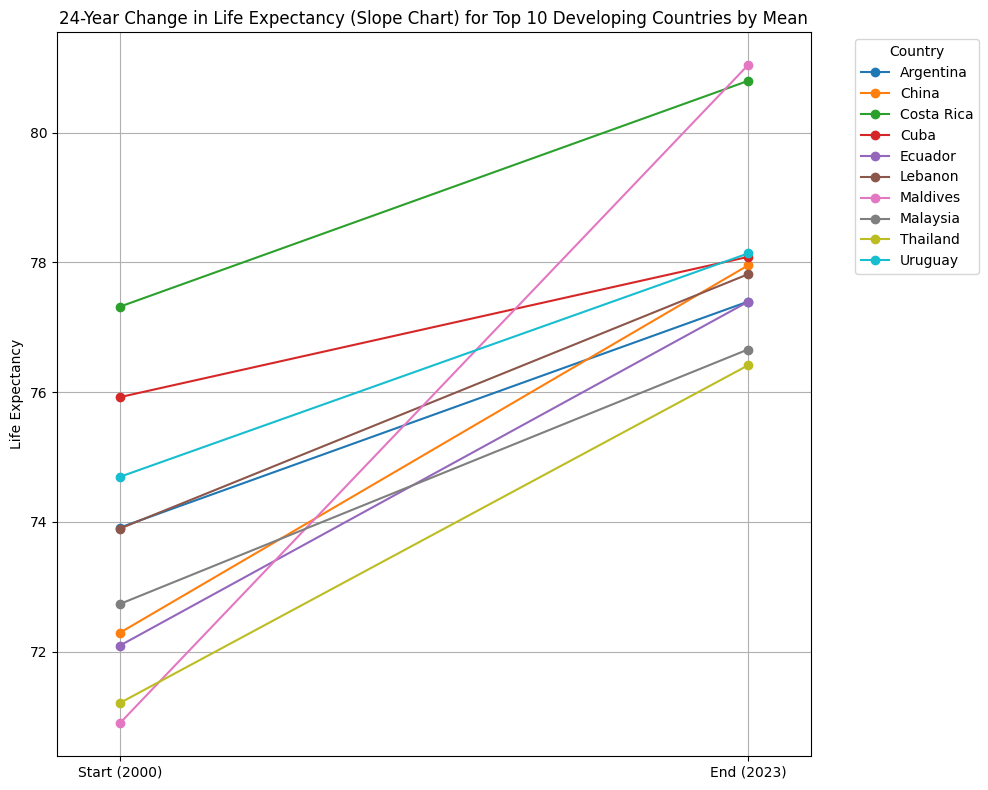

In [43]:
plt.figure(figsize=(10, 8)) # Adjusted figure size slightly for the legend

# Get a colormap for distinct colors
cmap = plt.get_cmap('tab10') # Using 'tab10' colormap, suitable for up to 10 distinct colors
colors = [cmap(i) for i in range(len(merged_top_10))] # Generate colors

for i, r in merged_top_10.iterrows():
    # Plot the line for each country, assigning a unique color and label
    plt.plot([0, 1], [r["life_expectancy_start"], r["life_expectancy_end"]],
             marker="o", label=r["country"], color=colors[i])

plt.xticks([0, 1], ["Start (2000)", "End (2023)"])
plt.ylabel("Life Expectancy")
plt.title("24-Year Change in Life Expectancy (Slope Chart) for Top 10 Developing Countries by Mean")
plt.xlim(-0.1, 1.1) # Adjusted x-limits slightly
plt.grid(True)
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left') # Add legend outside the plot
plt.tight_layout() # Adjust layout to prevent legend from overlapping
plt.show()

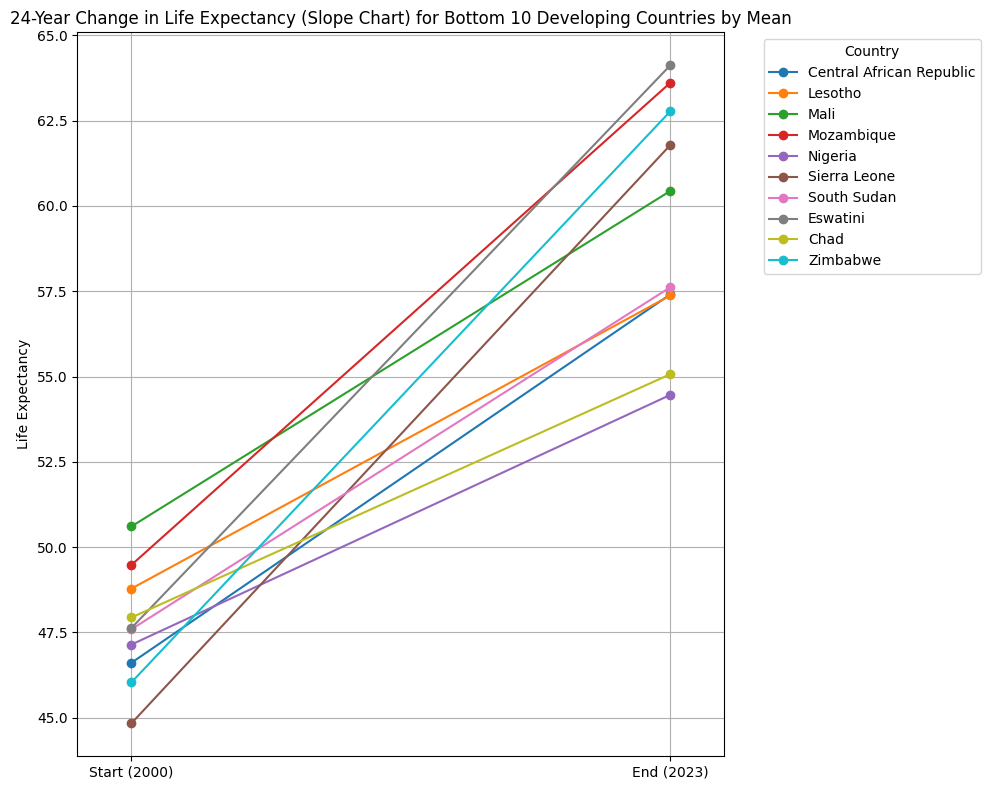

In [44]:
plt.figure(figsize=(10, 8)) # Adjusted figure size slightly for the legend

# Get a colormap for distinct colors
cmap = plt.get_cmap('tab10') # Using 'tab10' colormap, suitable for up to 10 distinct colors
colors = [cmap(i) for i in range(len(merged_top_10))] # Generate colors

for i, r in merged_bottom_10.iterrows():
    # Plot the line for each country, assigning a unique color and label
    plt.plot([0, 1], [r["life_expectancy_start"], r["life_expectancy_end"]],
             marker="o", label=r["country"], color=colors[i])

plt.xticks([0, 1], ["Start (2000)", "End (2023)"])
plt.ylabel("Life Expectancy")
plt.title("24-Year Change in Life Expectancy (Slope Chart) for Bottom 10 Developing Countries by Mean")
plt.xlim(-0.1, 1.1) # Adjusted x-limits slightly
plt.grid(True)
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left') # Add legend outside the plot
plt.tight_layout() # Adjust layout to prevent legend from overlapping
plt.show()